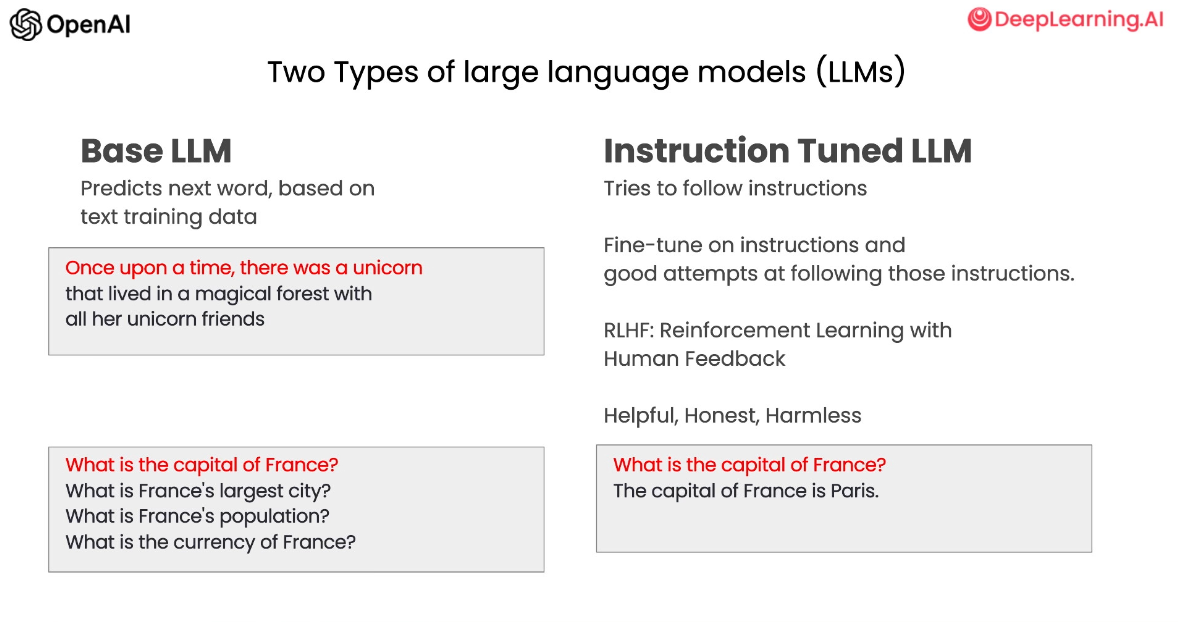

# Principles of Prompting
- Write clear and specific instructions
- Give the model time to `think`

## Principle 1: Write clear and specific instructions

In [102]:
from openai import OpenAI
import panel as pn  
from IPython.display import display, Markdown, HTML, JSON, Latex
client = OpenAI()

In [87]:
def get_completion(prompt, model="gpt-4.1-mini", temperature=0):
    """
    Generate a completion from an OpenAI chat model given a user prompt.

    Args:
        prompt (str): The text input provided by the user to guide the model's response.
        model (str, optional): The identifier of the OpenAI model to use. 
            Defaults to "gpt-4.1-mini".

    Returns:
        str: The model's text response to the given prompt.

    Notes:
        - The function sets `temperature=0` for deterministic output (minimal randomness).
        - Uses OpenAI's ChatCompletion API under the hood.
    """
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

### Tactic 1: Use delimiters to clearly indicate distinct parts of the input. 
Delimiters can be anything like: ```, """, < >, <tag> </tag>

In [7]:
text = f"""
You should express what you want a model to do by  providing instructions that are as clear and 
specific as you can possibly make them. This will guide the model towards the desired output, 
and reduce the chances of receiving irrelevant or incorrect responses. Don't confuse writing a
clear prompt with writing a short prompt. In many cases, longer prompts provide more clarity 
and context for the model, which can lead to more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To obtain accurate and relevant responses from a model, provide clear, specific, and detailed instructions rather than focusing on brevity.


### Tactic 2: Ask for a structured output

In [8]:
prompt = f"""
Generate a list of three made-up book titles along with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

```json
[
  {
    "book_id": "B001",
    "title": "The Whispering Shadows",
    "author": "Lena Marlowe",
    "genre": "Mystery"
  },
  {
    "book_id": "B002",
    "title": "Celestial Drift",
    "author": "Rajiv Khatri",
    "genre": "Science Fiction"
  },
  {
    "book_id": "B003",
    "title": "Harvest of Dreams",
    "author": "Maya Ellington",
    "genre": "Historical Fiction"
  }
]
```


### Tactic 3: Ask the model to check whether conditions are satisfied

In [10]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some water boiling. While that's happening, 
grab a cup and put a tea bag in it. Once the water is hot enough, just pour it over the tea bag.
Let it sit for a bit so the tea can steep. After a few minutes, take out the tea bag. If you like, 
you can add some sugar or milk to taste. And that's it! You've got yourself a delicious cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple backticks. 
If it contains a sequence of instructions, re-write those 
instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, then simply write "No steps provided."
```{text_1}```
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.  
Step 2 - Grab a cup and put a tea bag in it.  
Step 3 - Once the water is hot enough, pour it over the tea bag.  
Step 4 - Let it sit for a bit so the tea can steep.  
Step 5 - After a few minutes, take out the tea bag.  
Step 6 - Add some sugar or milk to taste, if you like.  
Step 7 - Enjoy your cup of tea.


In [11]:
text_2 = f"""
The sun is shining brightly today, and the birds are singing. 
It's a beautiful day to go for a walk in the park. The flowers are blooming, 
and the trees are swaying gently in the breeze. People are out and about, 
enjoying the lovely weather. Some are having picnics, while others are playing 
games or simply relaxing on the grass. It's a perfect day to spend time outdoors 
and appreciate the beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple dashes. 
If it contains a sequence of instructions, re-write those 
instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, 
then simply write "No steps provided."

---{text_2}---
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


### Tactic 4: "Few-shot" prompting
Give successful exampls of completing tasks

In [12]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest valley flows from a modest spring; 
the grandest symphony originates from a single note; the most intricate tapestry 
begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: The tallest tree weathers countless storms yet stands firm; the strongest steel is forged in the hottest fire; the brightest stars emerge only after the darkest nights.


## Principle 2: Give the model time to “think”
#### Tactic 1: Specify the steps required to complete a task

In [13]:
text = f"""
In a charming village, siblings Jack and Jill set out on 
a quest to fetch water from a hilltop well. As they climbed, 
singing joyfully, misfortune struck—Jack tripped on a stone and tumbled 
down the hill, with Jill following suit. Though slightly battered, the 
pair returned home to comforting embraces. Despite the mishap, their 
adventurous spirits remained undimmed, and they continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
Jack and Jill, siblings from a charming village, embarked on a joyful quest to fetch water from a hilltop well but tumbled down the hill, yet their adventurous spirits remained undimmed.

Jack et Jill, frères et sœurs d'un charmant village, se sont lancés dans une quête joyeuse pour aller chercher de l'eau à un puits au sommet d'une colline, mais sont tombés de la colline, cependant leurs esprits aventureux sont restés intacts.

Names in the French summary: Jack, Jill

{
  "french_summary": "Jack et Jill, frères et sœurs d'un charmant village, se sont lancés dans une quête joyeuse pour aller chercher de l'eau à un puits au sommet d'une colline, mais sont tombés de la colline, cependant leurs esprits aventureux sont restés intacts.",
  "num_names": 2
}


### Ask for output in a specified format

In [14]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Text: <
In a charming village, siblings Jack and Jill set out on 
a quest to fetch water from a hilltop well. As they climbed, 
singing joyfully, misfortune struck—Jack tripped on a stone and tumbled 
down the hill, with Jill following suit. Though slightly battered, the 
pair returned home to comforting embraces. Despite the mishap, their 
adventurous spirits remained undimmed, and they continued exploring with delight.
>
Summary: Jack and Jill, siblings from a charming village, fell while fetching water but remained adventurous and continued exploring.  
Translation: Jack et Jill, frères et sœurs d'un village charmant, sont tombés en allant chercher de l'eau mais sont restés aventureux et ont continué à explorer.  
Names: ["Jack", "Jill"]  
Output JSON: {"french_summary": "Jack et Jill, frères et sœurs d'un village charmant, sont tombés en allant chercher de l'eau mais sont restés aventureux et ont continué à explorer.", "num_names": 2}


### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion¶

In [17]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, 
and an additional $10 / square foot.
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
# print(response)
display(Markdown(response))

Let's review the student's solution step-by-step:

**Given:**
- Land cost = $100 per square foot
- Solar panels = $250 per square foot
- Maintenance = $100,000 flat + $10 per square foot

**Student's solution:**
- Land cost: \(100x\) (correct)
- Solar panel cost: \(250x\) (correct)
- Maintenance cost: \(100,000 + 100x\) (incorrect)

The student used \(100x\) for the variable maintenance cost, but the problem states it is **$10 per square foot**, not $100.

**Correct maintenance cost:**
\[
100,000 + 10x
\]

**Total cost:**
\[
100x + 250x + 100,000 + 10x = (100 + 250 + 10)x + 100,000 = 360x + 100,000
\]

---

### Conclusion:
The student's solution is **incorrect** because they used $100 per square foot for maintenance instead of $10 per square foot.

**Correct total cost function:**
\[
\boxed{C(x) = 360x + 100,000}
\]

In [18]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, 
and an additional $10 / square foot. What is the total cost for the first year of operations 
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

Question:
```
I'm building a solar power installation and I need help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, 
and an additional $10 / square foot. What is the total cost for the first year of operations 
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
```
Let x be the size of the installation in square feet.

1. Land cost = $100 per square foot
   So, land cost = 100x

2. Solar panel cost = $250 per square foot
   So, solar panel cost = 250x

3. Maintenance cost = flat $100,000 + $10 per square foot
   So, maintenance cost = 100,000 + 10x

Total cost = land cost + solar panel cost + maintenance

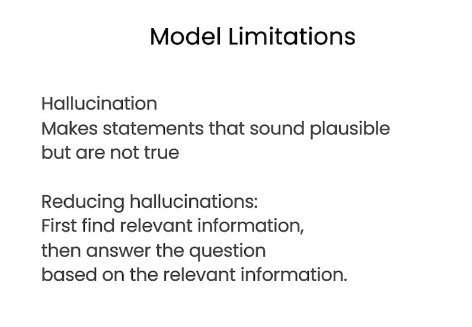

In [19]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a modern, high-tech electric toothbrush designed to enhance oral hygiene through advanced features and sleek design. Here are some key details about it:

- **Design:** The AeroGlide UltraSlim features a slim, lightweight body that makes it easy to handle and maneuver. Its minimalist and stylish design appeals to users looking for both functionality and aesthetics.

- **Smart Technology:** Equipped with smart sensors and Bluetooth connectivity, the toothbrush can sync with a mobile app to provide real-time feedback on brushing habits, coverage, and pressure. This helps users improve their brushing technique and maintain better oral health.

- **Brushing Modes:** It typically offers multiple brushing modes such as Clean, Sensitive, Whitening, and Gum Care, allowing users to customize their brushing experience based on their needs.

- **Battery Life:** The toothbrush boasts a long-lasting rechargeable battery, often providing several wee

# Iterative Prompt Development
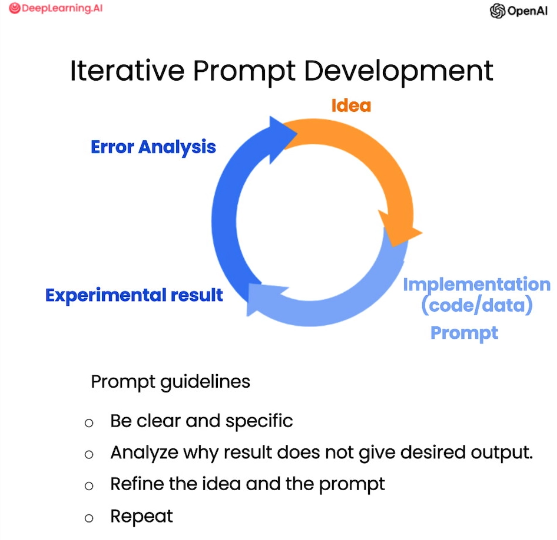abs


## Generate a marketing product description from a product fact sheet

In [20]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Elevate your workspace with this stylish mid-century inspired office chair, designed to blend seamlessly into both home and professional environments. Part of a sophisticated collection that includes filing cabinets, desks, bookcases, and meeting tables, this chair offers customizable options to perfectly suit your style and comfort needs.

Choose from a variety of shell colors and base finishes—including stainless steel, matte black, gloss white, or chrome—to complement your décor. Upholstery options include a sleek plastic back and front (SWC-100) or full upholstery (SWC-110), available in 10 fabric and 6 premium leather selections. For added comfort, select between armless or 8-position polyurethane armrests and two foam densities (medium or high) to tailor your seating experience.

Crafted with a durable 5-wheel plastic-coated aluminum base and featuring a pneumatic height adjustment, this chair ensures smooth mobility and easy customization. Its compact dimensions (53 cm wide x 51

### Issue 1: The text is too long
Limit the number of words/sentences/characters.

In [21]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Mid-century inspired office chair with customizable upholstery, base finishes, and armrest options. Features a durable aluminum base, pneumatic height adjustment, and soft or hard-floor casters. Comfortable HD36 foam seat, suitable for home or contract use. Crafted in Italy with premium materials.


In [22]:
len(response.split())

41

### Issue 2. Text focuses on the wrong details
Ask it to focus on the aspects that are relevant to the intended audience.

In [23]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Mid-century inspired office chair featuring a 10mm thick cast aluminum shell with PA6/PA66 nylon coating, supported by a 5-wheel plastic-coated aluminum base. Seat constructed with HD36 foam, offering customizable foam densities and armrest options. Available in multiple upholstery and base finishes. Made in Italy, contract-grade quality.


In [24]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

This mid-century inspired office chair features a 10mm thick cast aluminum shell with a durable PA6/PA66 nylon coating. The 5-wheel plastic-coated aluminum base ensures stability, while HD36 foam seat offers comfort. Available with multiple upholstery, base finishes, and caster options. Product ID: SWC-100, SWC-110


### Issue 3. Description needs a table of dimensions¶
Ask it to extract information and organize it in a table.

In [25]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

```html
<div>
  This mid-century inspired office chair is engineered with a focus on durable, high-quality materials suitable for both home and contract use. The chair features a robust 5-wheel base constructed from cast aluminum, enhanced with a modified nylon PA6/PA66 coating to ensure long-lasting performance and resistance to wear. The shell, with a thickness of 10 mm, provides structural integrity while maintaining a sleek profile. The seat is crafted using HD36 foam, available in two densities—medium (1.8 lb/ft³) or high (2.8 lb/ft³)—to offer customizable comfort and support. The chair includes a pneumatic adjustment mechanism for smooth height control and is equipped with plastic-coated aluminum gliders for added durability. Upholstery options include plastic back and front (SWC-100) or full upholstery (SWC-110) in a variety of 10 fabric and 6 leather finishes, complemented by multiple base finish choices such as stainless steel, matte black, gloss white, or chrome. Additional f

# Summarizing
# Summarize with a word/sentence/character limit

In [31]:
prod_review = """
Got this panda plush toy for my daughter's birthday, who loves it and takes it everywhere. 
It's soft and super cute, and its face has a friendly look. It's a bit small for what I paid 
though. I think there might be other options that are bigger for the same price. It arrived a 
day earlier than expected, so I got to play with it myself before I gave it to her.
"""

prompt = f"""
Your task is to generate a short summary of a product review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)
print()

response = get_completion(prompt, model="gpt-3.5-turbo")
print(response)
print()

response = get_completion(prompt, model="gpt-4o-mini")
print(response)

The panda plush is soft, cute, and has a friendly face. It arrived early, but is smaller than expected for the price. Overall, my daughter loves it.

The panda plush toy is soft, cute, and loved by the daughter. However, it's smaller than expected for the price paid. Arrived early.

The panda plush toy is soft, cute, and loved by my daughter, but it's smaller than expected for the price. It arrived early, allowing me to enjoy it first.


## Summarize with a focus on shipping and delivery

In [29]:
prompt = f"""
Your task is to generate a short summary of a product review from an 
ecommerce site to give feedback to the Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects that 
mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The panda plush toy arrived a day earlier than expected, providing a positive delivery experience.


## Summarize with a focus on price and value

In [32]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The plush is soft and cute but smaller than expected for the price, suggesting better-sized alternatives may exist at similar cost, impacting perceived value. Early delivery was a positive.


In [33]:
prompt = f"""
Your task is to extract relevant information from
a product review from an ecommerce site to give
feedback to the Shipping department. 

From the review below, delimited by triple quotes
extract the information relevant to shipping and
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The product arrived a day earlier than expected, allowing the reviewer to receive it before the occasion. No issues with shipping or delivery were mentioned.


In [34]:
review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one had additional storage and not too high of a price
point. Got it fast - arrived in 2 days. The string to the lamp broke during the transit and the company 
happily sent over a new one. Came within a few days as well. It was easy to put together. Then I had a 
missing part, so I contacted their support and they very quickly got me the missing piece! Seems to me 
to be a great company that cares about their customers and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, which is why I got this. The battery life seems to be
pretty impressive so far. After initial charging and leaving the charger plugged in for the first week to 
condition the battery, I've unplugged the charger and been using it for twice daily brushing for the last 
3 weeks all on the same charge. But the toothbrush head is too small. I’ve seen baby toothbrushes bigger than 
this one. I wish the head was bigger with different length bristles to get between teeth better because 
this one doesn’t.  Overall if you can get this one around the $50 mark, it's a good deal. The manufactuer's 
replacements heads are pretty expensive, but you can get generic ones that're more reasonably priced. This 
toothbrush makes me feel like I've been to the dentist every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal sale for around $49 in the month of November, about 
half off, but for some reason (call it price gouging) around the second week of December the prices all went
up to about anywhere from between $70-$89 for the same system. And the 11 piece system went up around $10 or 
so in price also from the earlier sale price of $29. So it looks okay, but if you look at the base, the part 
where the blade locks into place doesn’t look as good as in previous editions from a few years ago, but I 
plan to be very gentle with it (example, I crush very hard items like beans, ice, rice, etc. in the  
blender first then pulverize them in the serving size I want in the blender then switch to the whipping 
blade for a finer flour, and use the cross cutting blade first when making smoothies, then use the flat blade 
if I need them finer/less pulpy). Special tip when making smoothies, finely cut and freeze the fruits and 
vegetables (if using spinach-lightly stew soften the spinach then freeze until ready for use-and if making 
sorbet, use a small to medium sized food processor) that you plan to use that way you can avoid adding so 
much ice if at all-when making your smoothie. After about a year, the motor was making a funny noise.
I called customer service but the warranty expired already, so I had to buy another one. FYI: The overall
quality has gone done in these types of products, so they are kind of counting on brand recognition and
consumer loyalty to maintain sales. Got it in about two days.
"""

reviews = [review_1, review_2, review_3, review_4]

for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product review from an ecommerce site. 

    Summarize the review below, delimited by triple backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")

0 Soft, cute panda plush loved by daughter; arrives early but smaller than expected for the price. 

1 Lamp with storage, affordable, fast shipping, easy assembly, excellent customer service with quick replacement parts. 

2 Impressive battery life and effective cleaning, but toothbrush head is too small; good value around $50 with cheaper replacement heads. 

3 Prices increased after sale; quality declined, motor failed after a year; customer service unhelpful post-warranty. 



# Inferring
## Product review text

In [36]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had additional storage and not too high of a 
price point. Got it fast.  The string to our lamp broke during the transit and the company happily 
sent over a new one. Came within a few days as well. It was easy to put together.  I had a missing part, 
so I contacted their support and they very quickly got me the missing piece! Lumina seems to me to be a 
great company that cares about their customers and products!!
"""

## Sentiment (positive/negative)

In [37]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the review is positive. The reviewer appreciates the product's features, the fast delivery, and the responsive customer service, indicating overall satisfaction.


In [38]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

positive


## Identify types of emotions¶ 

In [40]:
prompt = f"""
Identify a list of emotions that the writer of the following review is expressing. 
Include no more than five items in the list. Format your answer as a list of lower-case 
words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

satisfaction, relief, appreciation, trust, happiness


## Identify anger

In [42]:
prompt = f"""
Is the writer of the following review expressing anger? The review is delimited with
triple backticks. Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


## Extract product and company name from customer reviews

In [43]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. Format your response as a 
JSON object with "Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

```json
{"Item":"lamp","Brand":"Lumina"}
```


In [45]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. 
Format your response as a JSON object with 
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)
print()

response = get_completion(prompt, model="gpt-4o-mini")
print(response)

```json
{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}
```

```json
{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}
```


## Inferring topics
### Infer 5 topics

In [52]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""


prompt = f"""
Determine five topics that are being discussed in the 
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a numbered list of items.

Text sample: ```{story}```
"""
response = get_completion(prompt)
print(response)
print()
response = get_completion(prompt, model="gpt-3.5-turbo")
print(response)
print()
response = get_completion(prompt, model="gpt-4o-mini")
print(response)

1. Employee satisfaction  
2. NASA  
3. Government survey  
4. Public sector  
5. Job improvement

1. Survey
2. Job satisfaction
3. NASA
4. Social Security Administration
5. Government pledge

1. Job Satisfaction  
2. NASA  
3. Employee Feedback  
4. Government Survey  
5. Social Security Administration  


## Make a news alert for certain topics

In [49]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

prompt = f"""
Determine whether each item in the following list of
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as follows:
item from the list: 0 or 1

List of topics: {", ".join(topic_list)}

Text sample: ```{story}```
"""
response = get_completion(prompt)
print(response)

nasa: 1  
local government: 0  
engineering: 0  
employee satisfaction: 1  
federal government: 1


In [50]:
topic_dict = {i.split(': ')[0]: int(i.split(': ')[1]) for i in response.split(sep='\n')}
if topic_dict['nasa'] == 1:
    print("ALERT: New NASA story!")

ALERT: New NASA story!


In [53]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

prompt = f"""
Determine whether each item in the following list of
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as a json object as follows:
item from the list: 0 or 1

List of topics: {", ".join(topic_list)}

Text sample: ```{story}```
"""
response = get_completion(prompt)
print(response)

```json
{
  "nasa": 1,
  "local government": 0,
  "engineering": 0,
  "employee satisfaction": 1,
  "federal government": 1
}
```


# Transforming
## Translation
ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [54]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría pedir una licuadora.


In [55]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

The language is French. The sentence "Combien coûte le lampadaire?" translates to "How much does the floor lamp cost?" in English.


In [57]:
prompt = f"""
Translate the following text to French and Spanish
and English pirate:
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

Sure! Here are the translations:

**French:**  
Je veux commander un ballon de basket.

**Spanish:**  
Quiero pedir un balón de baloncesto.

**English Pirate:**  
I be wantin' to order me a basketball, arrr!


In [58]:
prompt = f"""
Translate the following text to Spanish in both the formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Sure! Here are the translations:

**Formal:**  
¿Le gustaría ordenar una almohada?

**Informal:**  
¿Te gustaría ordenar una almohada?


## Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [65]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```. Use only one word"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following text to English and Korean: ```{issue}```.
    Return the result as a json object with the following keys: issue, english, korean
    """
    response = get_completion(prompt)
    print(response, "\n=======================\n")

Original message (French): La performance du système est plus lente que d'habitude.
```json
{
  "issue": "La performance du système est plus lente que d'habitude.",
  "english": "The system performance is slower than usual.",
  "korean": "시스템 성능이 평소보다 느립니다."
}
``` 

Original message (Spanish): Mi monitor tiene píxeles que no se iluminan.
```json
{
  "issue": "Mi monitor tiene píxeles que no se iluminan.",
  "english": "My monitor has pixels that do not light up.",
  "korean": "내 모니터에 불이 켜지지 않는 픽셀이 있습니다."
}
``` 

Original message (Italian): Il mio mouse non funziona
```json
{
  "issue": "Il mio mouse non funziona",
  "english": "My mouse is not working",
  "korean": "내 마우스가 작동하지 않습니다"
}
``` 

Original message (Polish): Mój klawisz Ctrl jest zepsuty
```json
{
  "issue": "Mój klawisz Ctrl jest zepsuty",
  "english": "My Ctrl key is broken",
  "korean": "내 Ctrl 키가 고장났어요"
}
``` 

Original message (Chinese): 我的屏幕在闪烁
```json
{
  "issue": "我的屏幕在闪烁",
  "english": "My screen is flickering",
  "k

## Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.

In [66]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Certainly! Here is a more formal version suitable for a business letter:

---

Dear [Recipient's Name],

I hope this message finds you well. This is Joe. Please find attached the specifications for the standing lamp for your review.

Best regards,  
Joe

---

If you provide the recipient's name or additional context, I can customize it further.


## Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [67]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Restaurant Employees</title>
    <style>
        table {
            border-collapse: collapse;
            width: 50%;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid #333;
            padding: 8px 12px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
        caption {
            font-size: 1.5em;
            margin-bottom: 10px;
            font-weight: bold;
        }
    </style>
</head>
<body>

<table>
    <caption>Restaurant Employees</caption>
    <thead>
        <tr>
            <th>Name</th>
            <th>Email</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Shyam</td>
            <td>shyamjaiswal@gmail.com</td>
        </tr>
        <tr>
            <td>Bob</td>
            <td>bob32@gmail.com</td>
        </tr>
        <tr>
            <td>Jai</td>
            <td>jai87@gma

In [70]:
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


## Spellcheck/Grammar check.
Here are some examples of common grammar and spelling problems and the LLM's response.  
To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [71]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball
Yolanda has her notebook
Its going to be a long day Does the car need its oil changed
Their goes my freedom There going to bring their suitcases
Youre going to need your notebook
That medicine affects my ability to sleep Have you heard of the butterfly effect
This phrase is to check chatGPT for spelling ability


In [82]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking mine from my room.  Yes, adults also like pandas too. 
She takes it everywhere with her, and it's super soft and cute. One of the ears is a bit lower than the other, and 
I don't think that was designed to be asymmetrical. It's a bit small for what I paid for it though. I think there
might be other options that are bigger for the same price.  It arrived a day earlier than expected, so I got
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

Here is a polished and corrected version of your review:

---

I got this for my daughter for her birthday because she keeps taking mine from my room. Yes, adults like pandas too!  
She takes it everywhere with her, and it’s super soft and cute. One of the ears is a bit lower than the other, and I don’t think it was designed to be asymmetrical. It’s a bit small for the price, though—I think there might be other options that are bigger for the same cost.  
It arrived a day earlier than expected, so I got to play with it myself before giving it to my daughter.

---

Let me know if you'd like it more formal or casual!


In [76]:
# !pip install redlines

In [83]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

<span style='color:red;font-weight:700;text-decoration:line-through;'>Got </span><span style='color:green;font-weight:700;'>Here is a polished and corrected version of your review: </span>

<span style='color:green;font-weight:700;'>--- </span>

<span style='color:green;font-weight:700;'>I got </span>this for my daughter for her birthday <span style='color:red;font-weight:700;text-decoration:line-through;'>cuz </span><span style='color:green;font-weight:700;'>because </span>she keeps taking mine from my room.  Yes, adults <span style='color:red;font-weight:700;text-decoration:line-through;'>also </span>like pandas <span style='color:red;font-weight:700;text-decoration:line-through;'>too. </span><span style='color:green;font-weight:700;'>too! </span>

She takes it everywhere with her, and <span style='color:red;font-weight:700;text-decoration:line-through;'>it's </span><span style='color:green;font-weight:700;'>it’s </span>super soft and cute. One of the ears is a bit lower than the other, and <span style='color:red;font-weight:700;text-decoration:line-through;'>¶ </span>I <span style='color:red;font-weight:700;text-decoration:line-through;'>don't </span><span style='color:green;font-weight:700;'>don’t </span>think <span style='color:red;font-weight:700;text-decoration:line-through;'>that </span><span style='color:green;font-weight:700;'>it </span>was designed to be asymmetrical. <span style='color:red;font-weight:700;text-decoration:line-through;'>It's </span><span style='color:green;font-weight:700;'>It’s </span>a bit small for <span style='color:red;font-weight:700;text-decoration:line-through;'>what I paid for it though. I </span><span style='color:green;font-weight:700;'>the price, though—I </span>think there <span style='color:red;font-weight:700;text-decoration:line-through;'>¶ </span>might be other options that are bigger for the same <span style='color:red;font-weight:700;text-decoration:line-through;'>price.  </span><span style='color:green;font-weight:700;'>cost. </span>

<span style='color:green;font-weight:700;'></span>It arrived a day earlier than expected, so I got <span style='color:red;font-weight:700;text-decoration:line-through;'>¶ </span>to play with it myself before <span style='color:red;font-weight:700;text-decoration:line-through;'>I gave </span><span style='color:green;font-weight:700;'>giving </span>it to my daughter.<span style='color:green;font-weight:700;'></span>

<span style='color:green;font-weight:700;'>--- </span>

<span style='color:green;font-weight:700;'>Let me know if you'd like it more formal or casual!</span>

In [84]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

```markdown
**Product Review: Plush Panda Toy**

I purchased this plush panda for my daughter’s birthday, primarily because she frequently borrows mine from my room. Interestingly, this product appeals to adults as well, demonstrating its broad charm. My daughter now takes it everywhere, attesting to its comfort and appeal. The material is exceptionally soft, and the design is undeniably cute.

However, I did notice a minor flaw: one ear is positioned slightly lower than the other, which does not appear to be an intentional asymmetrical design choice. Additionally, the size of the plush is somewhat smaller than I anticipated given the price point. Comparable products of similar cost may offer larger dimensions.

On a positive note, the item arrived a day earlier than expected, allowing me the opportunity to appreciate its quality firsthand before gifting it. Overall, while there are minor drawbacks, this plush panda remains a delightful and well-received gift.

---
*Note: This review is intended for readers seeking a nuanced evaluation of plush toys, balancing aesthetic appeal, quality, and value.*
```

# Customize the automated reply to a customer email

In [85]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal sale for around $49 in the month of November, about 
half off, but for some reason (call it price gouging) around the second week of December the prices all went 
up to about anywhere from between $70-$89 for the same system. And the 11 piece system went up around $10 or 
so in price also from the earlier sale price of $29. So it looks okay, but if you look at the base, the part 
where the blade locks into place doesn’t look as good as in previous editions from a few years ago, but I 
plan to be very gentle with it (example, I crush very hard items like beans, ice, rice, etc. in the 
blender first then pulverize them in the serving size I want in the blender then switch to the whipping 
blade for a finer flour, and use the cross cutting blade first when making smoothies, then use the flat blade 
if I need them finer/less pulpy). Special tip when making smoothies, finely cut and freeze the fruits and 
vegetables (if using spinach-lightly stew soften the spinach then freeze until ready for use-and if making 
sorbet, use a small to medium sized food processor) that you plan to use that way you can avoid adding so 
much ice if at all-when making your smoothie. After about a year, the motor was making a funny noise. 
I called customer service but the warranty expired already, so I had to buy another one. FYI: The overall 
quality has gone done in these types of products, so they are kind of counting on brand recognition and 
consumer loyalty to maintain sales. Got it in about two days.
"""

prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for their review.
If the sentiment is negative, apologize and suggest that they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Subject: Thank You for Your Feedback

Dear Customer,

Thank you for taking the time to share your detailed review. We sincerely apologize for the issues you experienced, including the price increase after the seasonal sale, concerns about the base quality, and the motor noise after a year of use. We understand how frustrating this must be, especially given your thoughtful usage and tips for the product.

Although your warranty had expired, we encourage you to reach out to our customer service team directly for any further assistance or possible solutions. Your feedback is valuable and helps us improve our products and services.

Thank you again for your honest review.

Best regards,  
AI customer agent


## Remind the model to use details from the customer's email

In [88]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for their review.
If the sentiment is negative, apologize and suggest that they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Subject: Thank You for Your Feedback

Dear Customer,

Thank you for taking the time to share your detailed review. We apologize for the disappointment you experienced with the price changes and the quality concerns you noted, particularly regarding the base of the 17-piece system and the motor issue after a year of use. We understand how frustrating it can be when a product does not meet expectations, especially when the warranty has expired.

If you would like further assistance or have any questions, please feel free to reach out to our customer service team. We appreciate your loyalty and the valuable insights you have provided.

Best regards,  
AI customer agent


In [89]:
response = get_completion(prompt, temperature=2)
print(response)

Subject: Thank You for Your Feedback

Dear Customer,

Thank you for taking the time to share your detailed experience with our blenders. We apologize for the issues you've encountered, especially regarding the price changes and the wear you observed in the product over time. We're sorry to hear about the motor issue and the frustration around the warranty service.

Your feedback about product quality and our service is important to us. If you have any further concerns or require assistance, please do not hesitate to reach out to our customer service team directly.

Thank you again for your honesty and for being a valued customer.

Best regards,  
AI customer agent


# Chatbot

In [94]:
def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message.content

In [97]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'} ]

response = get_completion_from_messages(messages, temperature=1)
print(response)

To get to the other side, of course! 'Tis a classic jest, is it not?


In [98]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa! It's nice to meet you. How can I assist you today?


In [99]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I'm sorry, I can't remember your name because I don't have the ability to store personal information. How can I assist you today?


In [100]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Isa.


## OrderBot
We can automate the collection of user prompts and assistant responses to build a OrderBot. The OrderBot will take orders at a pizza restaurant.

In [126]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:',  pn.panel(pn.pane.Markdown(response, width=600), style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

In [120]:
# GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. 
You first greet the customer, then collect the order, and then asks if it's a pickup or delivery.
You wait to collect the entire order, then summarize it and check for a final time if the customer wants to add anything else. 
If it's a delivery, you ask for an address. Finally you collect the payment.
Make sure to clarify all options, extras and sizes to uniquely identify the item from the menu.
You respond in a short, very conversational friendly style. The menu includes 
pepperoni pizza  12.95, 10.00, 7.00 
cheese pizza   10.95, 9.25, 6.50 
eggplant pizza   11.95, 9.75, 6.75 
fries 4.50, 3.50 
greek salad 7.25 
Toppings: 
extra cheese 2.00, 
mushrooms 1.50 
sausage 3.00 
canadian bacon 3.50 
AI sauce 1.50 
peppers 1.00 
Drinks: 
coke 3.00, 2.00, 1.00 
sprite 3.00, 2.00, 1.00 
bottled water 5.00 
"""} ]  # accumulate messages

inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=800),)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, defer_load=False, height=800, loading_indicator=True)

In [122]:
import panel as pn

pn.extension()

# Widgets
inp = pn.widgets.TextInput(value="", placeholder="Enter text here…", width=400)
button_conversation = pn.widgets.Button(name="Chat!", button_type="primary")

# Conversation context and display panels
context = []
panels = []

# Markdown pane to show the conversation
chat_display = pn.Column(*panels, width=650, height=400, sizing_mode='fixed', scroll=True)

# Function to handle conversation
def collect_messages(event):
    prompt = inp.value_input.strip()
    #if prompt == "":
        #return  # Ignore empty input
    
    inp.value = ''  # Clear input
    
    # Update context
    context.append({'role':'user', 'content': prompt})
    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content': response})
    
    # Add user message
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600))
    )
    
    # Add assistant message with styling
    panels.append(
        pn.Row(
            'Assistant:',
            pn.panel(
                pn.pane.Markdown(response, width=600),
                style={'background-color': '#F6F6F6', 'padding': '10px', 'border-radius': '5px'}
            )
        )
    )
    
    # Update chat display
    chat_display[:] = panels  # Replace content dynamically

# Bind button click
button_conversation.on_click(collect_messages)

# Layout
dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    chat_display
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…', width=400)
    [1] Row
        [0] Button(button_type='primary', name='Chat!')
    [2] Column(height=400, scroll=True, sizing_mode='fixed', width=650)

In [127]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, defer_load=False, height=300, loading_indicator=True)

In [132]:
import panel as pn
pn.extension()

# Widgets
inp = pn.widgets.TextInput(value="Hi", placeholder="Enter text here…", width=400)
button_conversation = pn.widgets.Button(name="Chat!", button_type="primary")

panels = []

# Display column
chat_display = pn.Column(*panels, width=650, height=300, scroll=True)

# Function to handle messages
def collect_messages(event):
    prompt = inp.value_input
    #if not prompt:
        #return
    inp.value = ''  # clear input
    
    # Add user message
    context.append({'role':'user', 'content': f"{prompt}"})
    panels.append(pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    
    # Generate assistant response
    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content': f"{response}"})
    panels.append(
        pn.Row(
            'Assistant:',
            pn.panel(
                pn.pane.Markdown(response, width=600),
                style={'background-color': '#F6F6F6', 'padding': '10px', 'border-radius': '5px'}
            )
        )
    )
    
    chat_display[:] = panels  # Update chat display dynamically

# Bind the button click (works locally and on Coursera)
button_conversation.on_click(collect_messages)

# Layout
dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    chat_display
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…', value='Hi', width=400)
    [1] Row
        [0] Button(button_type='primary', name='Chat!')
    [2] Column(height=300, scroll=True, sizing_mode='fixed', width=650)

In [133]:
import panel as pn
pn.extension()

# Widgets
inp = pn.widgets.TextInput(value="Hi", placeholder="Enter text here…", width=400)
button_conversation = pn.widgets.Button(name="Chat!", button_type="primary")

# Persistent containers
panels = []
chat_display = pn.Column(*panels, width=650, height=300, scroll=True)

# Button click handler
def collect_messages(event):
    prompt = inp.value.strip()
    if not prompt:
        return
    inp.value = ''  # Clear input

    context.append({'role':'user', 'content': prompt})
    panels.append(pn.Row('User:', pn.pane.Markdown(prompt, width=600)))

    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content': response})
    panels.append(
        pn.Row(
            'Assistant:',
            pn.panel(
                pn.pane.Markdown(response, width=600),
                style={'background-color': '#F6F6F6', 'padding': '10px', 'border-radius': '5px'}
            )
        )
    )

    # Update chat display dynamically
    chat_display[:] = panels

# Bind the button click (works locally)
button_conversation.on_click(collect_messages)

# Layout
dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    chat_display
)

dashboard.show()


Launching server at http://localhost:57779


In [136]:
def get_completion_from_messages_mock(context):
    last_user_msg = context[-1]['content'].lower()
    # Simple simulated behavior
    if "hi" in last_user_msg:
        return "Hi! Welcome to PizzaBot 🍕 What would you like to order today?"
    elif "pepperoni" in last_user_msg:
        return "Great! What size would you like: small, medium, or large?"
    elif "small" in last_user_msg:
        return "Perfect. Would this be pickup or delivery?"
    elif "delivery" in last_user_msg:
        return "Got it! Can I have your delivery address?"
    elif "address" in last_user_msg:
        return "Thanks! Your order is confirmed. Would you like anything else?"
    elif "no" in last_user_msg:
        return "Thank you for your order! 🍕"
    else:
        return "Could you clarify your order, please?"

In [137]:
import panel as pn
pn.extension()

# Persistent display
panels = []
chat_display = pn.Column(*panels, width=650, height=400, sizing_mode='fixed', scroll=True)

# Input and button
inp = pn.widgets.TextInput(value="", placeholder="Enter text here…", width=400)
button_conversation = pn.widgets.Button(name="Chat!", button_type="primary")

# Conversation context
context = [{'role':'system','content':'You are OrderBot.'}]

# Mock assistant function
def get_completion_from_messages(context):
    last = context[-1]['content'].lower()
    if "hi" in last:
        return "Hello! Welcome to PizzaBot. What would you like to order?"
    elif "pepperoni" in last:
        return "Great! What size would you like?"
    else:
        return "Could you clarify your order?"

# Handler
def collect_messages(event):
    prompt = inp.value.strip()
    if not prompt:
        return
    inp.value = ''
    
    # User message
    context.append({'role':'user','content':prompt})
    panels.append(pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    
    # Assistant message
    response = get_completion_from_messages_mock(context)
    context.append({'role':'assistant','content':response})
    panels.append(
        pn.Row(
            'Assistant:',
            pn.panel(
                pn.pane.Markdown(response, width=600),
                style={'background-color':'#F6F6F6','padding':'10px','border-radius':'5px'}
            )
        )
    )
    
    # Update display
    chat_display[:] = panels

button_conversation.on_click(collect_messages)

# Layout
dashboard = pn.Column(inp, pn.Row(button_conversation), chat_display)
dashboard.show()


Launching server at http://localhost:64005


In [142]:
import panel as pn
pn.extension()

# Persistent containers
panels = []
chat_display = pn.Column(*panels, width=650, height=400, scroll=True)
context = [{'role':'system','content':'You are OrderBot, an automated pizza ordering bot.'}]

# Widgets
inp = pn.widgets.TextInput(value="", placeholder="Enter text here…", width=400)
button_conversation = pn.widgets.Button(name="Chat!", button_type="primary")

# Mock assistant
def get_completion_from_messages(context):
    last_msg = context[-1]['content'].lower()
    if "hi" in last_msg:
        return "Hello! Welcome to PizzaBot 🍕 What would you like to order?"
    elif "pepperoni" in last_msg:
        return "Great! What size would you like: small, medium, or large?"
    else:
        return "Could you clarify your order?"

# Button click handler
def collect_messages(event=None):
    prompt = inp.value.strip()
    if not prompt:
        return
    inp.value = ''
    
    # Add user message
    context.append({'role':'user','content':prompt})
    panels.append(pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    
    # Add assistant message
    response = get_completion_from_messages(context)
    context.append({'role':'assistant','content':response})
    panels.append(
        pn.Row(
            'Assistant:',
            pn.panel(
                pn.pane.Markdown(response, width=600),
                style={'background-color':'#F6F6F6','padding':'10px','border-radius':'5px'}
            )
        )
    )
    
    # Update chat display dynamically
    chat_display.objects = panels

# Bind button click
button_conversation.on_click(collect_messages)

# Layout
dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    chat_display
)

# DISPLAY IN JUPYTER (do NOT use .show())
dashboard

Launching server at http://localhost:49683


C:\Users\okeyb\anaconda3\Lib\site-packages\param\parameterized.py:2523: RuntimeWarning: coroutine 'WSHandler.send_message' was never awaited
  return dict(pdict, **self_.self._param__private.params)
C:\Users\okeyb\anaconda3\Lib\pathlib\_local.py:289: RuntimeWarning: coroutine 'WSHandler.send_message' was never awaited
  @property
